In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [11]:
### Loading dataset
### --------------------

df = pd.read_csv("./data/german_credit_dataset.csv").drop('Sno', axis = 1)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


<AxesSubplot:xlabel='Age', ylabel='Credit amount'>

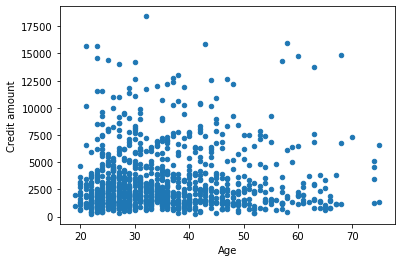

In [12]:
### Plotting data
### --------------------

df.plot(kind='scatter', x='Age', y='Credit amount')

array([<AxesSubplot:title={'center':'bad'}>,
       <AxesSubplot:title={'center':'good'}>], dtype=object)

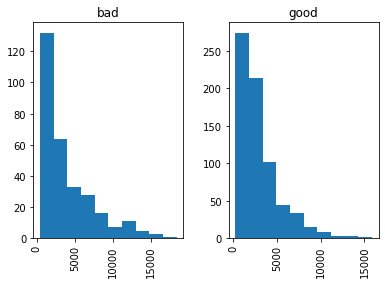

In [13]:
df.hist(column = 'Credit amount', by = 'Risk')

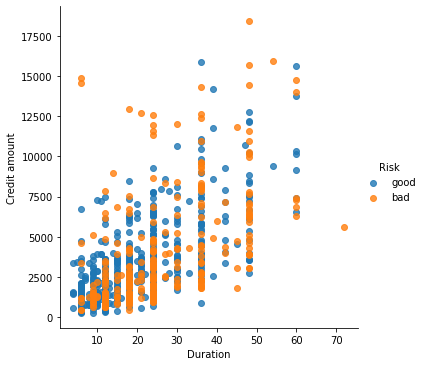

In [14]:
sns.lmplot('Duration', 'Credit amount', hue = 'Risk', data = df, fit_reg = False)

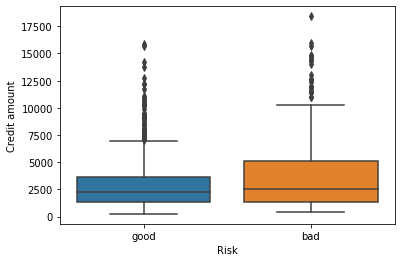

In [15]:
sns.boxplot(x = 'Risk', y = 'Credit amount', data = df)
plt.show()

In [16]:
### train ML model
### --------------------

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [17]:
y_raw = df['Risk']
X_raw = df.drop('Risk', axis=1)

In [18]:
### sklearn pipeline
### --------------------

categorical_features = X_raw.select_dtypes(include=['object']).columns
numeric_features = X_raw.select_dtypes(include=['int64', 'float']).columns

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value="missing")),
    ('onehotencoder', OneHotEncoder(categories='auto', sparse=False))])

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

feature_engineering_pipeline = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_features),
        ('categorical', categorical_transformer, categorical_features)
    ], remainder="drop")

# Encode Labels
le = LabelEncoder()
encoded_y = le.fit_transform(y_raw)

# Create sklearn pipeline
lr_clf = Pipeline(steps=[('preprocessor', feature_engineering_pipeline),
                         ('classifier', LogisticRegression(solver="lbfgs"))])

In [19]:

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_raw, encoded_y, test_size=0.20, stratify=encoded_y, random_state=42)

In [20]:
### fit model
### --------------------

lr_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Job', 'Credit amount', 'Duration'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(sparse=False))]),
                                                  Index(['Sex', 'Housing', 'Saving accoun

In [21]:
### evaluate model
### --------------------

print("Accuary on test data set: ", lr_clf.score(X_test, y_test))
print("Recall for class 'Bad':   ", recall_score(y_test, lr_clf.predict(X_test), pos_label=0))

Accuary on test data set:  0.735
Recall for class 'Bad':    0.45


In [22]:
### persisting model
### --------------------

joblib.dump(value=lr_clf, filename='model.pkl')

['model.pkl']

In [23]:
### making 5 predictions
### --------------------

new_data = df[:5]
new_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [24]:
lr_clf.predict(new_data)

array([1, 0, 1, 0, 1])

## Disclaimer

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.